In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
df=pd.read_csv('titanic.csv')

# data preprocessing

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
df['Sex']=np.where(df['Sex'].isin(['male']),1,0)
df.head()

KeyError: 'Sex'

In [12]:
df['Coach_number']=df['Ticket'].apply((lambda x:x.split()[0]))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Coach_number
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,PC
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,113803
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,373450


In [13]:
df['seat_number']=pd.to_numeric(df['Coach_number'],errors='coerce', downcast=None)
df['coach']=np.where(df['seat_number'].isna(),df['Coach_number'],np.nan)
df['coach'].fillna(method='ffill',inplace=True)
df['seat_number'].fillna(method='bfill',inplace=True)

In [14]:
df['seat_number']=df['seat_number'].astype(int)

In [15]:
df['Name']=df['Name'].astype(str).str.split().str.slice(0,3).str.join(' ')

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Coach_number,seat_number,coach
0,1,0,3,"Braund, Mr. Owen",1,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,113803,A/5
1,2,1,1,"Cumings, Mrs. John",0,38.0,1,0,PC 17599,71.2833,C85,C,PC,113803,PC
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,113803,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques",0,35.0,1,0,113803,53.1000,C123,S,113803,113803,STON/O2.
4,5,0,3,"Allen, Mr. William",1,35.0,0,0,373450,8.0500,NaN,S,373450,373450,STON/O2.


In [17]:
df['Survived']=df['Survived'].replace(0,df['Survived'].mean())

In [18]:
df['Survived']=df['Survived'].astype(int)

In [19]:
df['titel']=df['Name'].apply((lambda x:x.split()[0]))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Coach_number,seat_number,coach,titel
0,1,0,3,"Braund, Mr. Owen",1,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,113803,A/5,"Braund,"
1,2,1,1,"Cumings, Mrs. John",0,38.0,1,0,PC 17599,71.2833,C85,C,PC,113803,PC,"Cumings,"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,113803,STON/O2.,"Heikkinen,"
3,4,1,1,"Futrelle, Mrs. Jacques",0,35.0,1,0,113803,53.1000,C123,S,113803,113803,STON/O2.,"Futrelle,"
4,5,0,3,"Allen, Mr. William",1,35.0,0,0,373450,8.0500,NaN,S,373450,373450,STON/O2.,"Allen,"


In [20]:
df['sur_name']=df['Name'].apply((lambda x:x.split()[1]))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Coach_number,seat_number,coach,titel,sur_name
0,1,0,3,"Braund, Mr. Owen",1,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,113803,A/5,"Braund,",Mr.
1,2,1,1,"Cumings, Mrs. John",0,38.0,1,0,PC 17599,71.2833,C85,C,PC,113803,PC,"Cumings,",Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,113803,STON/O2.,"Heikkinen,",Miss.
3,4,1,1,"Futrelle, Mrs. Jacques",0,35.0,1,0,113803,53.1000,C123,S,113803,113803,STON/O2.,"Futrelle,",Mrs.
4,5,0,3,"Allen, Mr. William",1,35.0,0,0,373450,8.0500,NaN,S,373450,373450,STON/O2.,"Allen,",Mr.


In [21]:
df['midel_name']=df['Name'].apply((lambda x:x.split()[2]))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Coach_number,seat_number,coach,titel,sur_name,midel_name
0,1,0,3,"Braund, Mr. Owen",1,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,113803,A/5,"Braund,",Mr.,Owen
1,2,1,1,"Cumings, Mrs. John",0,38.0,1,0,PC 17599,71.2833,C85,C,PC,113803,PC,"Cumings,",Mrs.,John
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,113803,STON/O2.,"Heikkinen,",Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques",0,35.0,1,0,113803,53.1000,C123,S,113803,113803,STON/O2.,"Futrelle,",Mrs.,Jacques
4,5,0,3,"Allen, Mr. William",1,35.0,0,0,373450,8.0500,NaN,S,373450,373450,STON/O2.,"Allen,",Mr.,William


In [22]:
df.shape

(891, 18)

In [23]:
df.dtypes

PassengerId       int64
Survived          int32
Pclass            int64
Name             object
Sex               int32
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Coach_number     object
seat_number       int32
coach            object
titel            object
sur_name         object
midel_name       object
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int32  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int32  
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Coach_number  891 non-null    object 
 13  seat_number   891 non-null    int32  
 14  coach         891 non-null    object 
 15  titel         891 non-null    object 
 16  sur_name      891 non-null    object 
 17  midel_name    891 non-null    object 
dtypes: float64(2), int32(3), int64

In [25]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Coach_number      0
seat_number       0
coach             0
titel             0
sur_name          0
midel_name        0
dtype: int64

In [26]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,seat_number
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,2.754377e+05
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,5.116495e+05
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,6.930000e+02
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,2.526000e+04
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.361710e+05
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,3.477425e+05
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.101298e+06


In [27]:
a=df.dtypes[df.dtypes=='object'].index
df[a].describe()

,Name,Ticket,Cabin,Embarked,Coach_number,coach,titel,sur_name,midel_name
count,891,891,204,889,891,891,891,891,891
unique,887,681,147,3,557,43,661,31,435
top,"Flynn, Mr. John",347082,B96 B98,S,PC,PC,"Andersson,",Mr.,William
freq,2,7,4,644,60,241,9,502,48


In [28]:
b=df.columns[df.dtypes=='object']
df[b].describe()

,Name,Ticket,Cabin,Embarked,Coach_number,coach,titel,sur_name,midel_name
count,891,891,204,889,891,891,891,891,891
unique,887,681,147,3,557,43,661,31,435
top,"Flynn, Mr. John",347082,B96 B98,S,PC,PC,"Andersson,",Mr.,William
freq,2,7,4,644,60,241,9,502,48


In [29]:
char=df['Name'].astype(str)
new=[i[0] for i in char]

In [30]:
df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
seat_number   -0.093371
Name: Survived, dtype: float64

In [31]:
df.dtypes

PassengerId       int64
Survived          int32
Pclass            int64
Name             object
Sex               int32
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Coach_number     object
seat_number       int32
coach            object
titel            object
sur_name         object
midel_name       object
dtype: object

In [32]:
df.select_dtypes(include=['int64','float64']).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [33]:
df.select_dtypes(include='object').head()

,Name,Ticket,Cabin,Embarked,Coach_number,coach,titel,sur_name,midel_name
0,"Braund, Mr. Owen",A/5 21171,NaN,S,A/5,A/5,"Braund,",Mr.,Owen
1,"Cumings, Mrs. John",PC 17599,C85,C,PC,PC,"Cumings,",Mrs.,John
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,S,STON/O2.,STON/O2.,"Heikkinen,",Miss.,Laina
3,"Futrelle, Mrs. Jacques",113803,C123,S,113803,STON/O2.,"Futrelle,",Mrs.,Jacques
4,"Allen, Mr. William",373450,NaN,S,373450,STON/O2.,"Allen,",Mr.,William


In [34]:
## EDA 

In [35]:
# univariant

# 1. categorical Data

# a.countplot

In [36]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    549
1    342
Name: Survived, dtype: int64

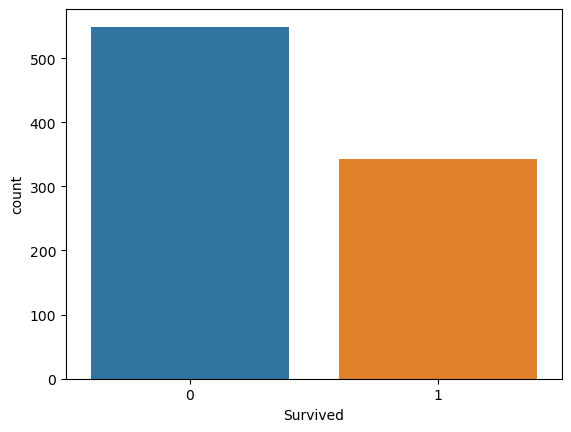

In [37]:
sns.countplot(df['Survived'])
df['Survived'].value_counts()

In [38]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

1    577
0    314
Name: Sex, dtype: int64

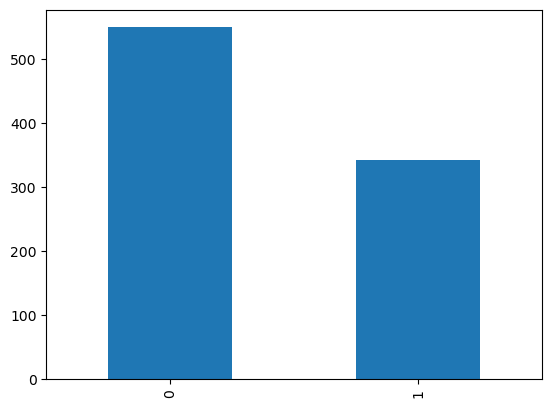

In [39]:
df['Survived'].value_counts().plot(kind='bar')
df['Sex'].value_counts()

<AxesSubplot:>

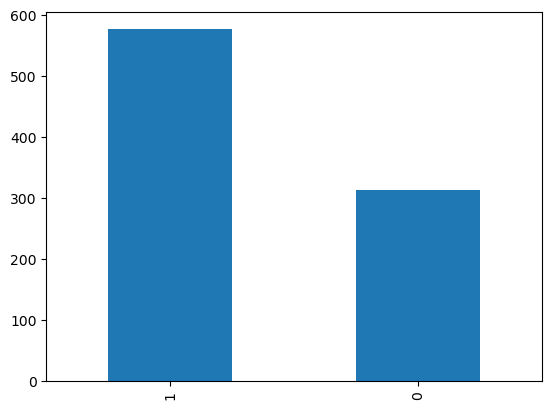

In [40]:
df['Sex'].value_counts().plot(kind='bar')

# b. Pie Chart in percentage

0    549
1    342
Name: Survived, dtype: int64

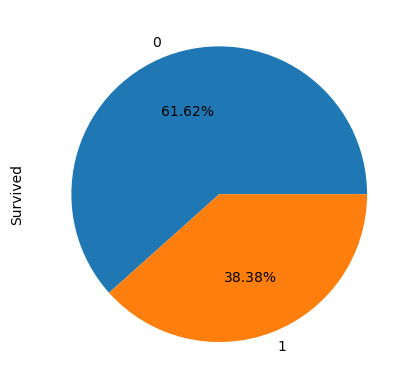

In [41]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.2f%%')
df['Survived'].value_counts()

<AxesSubplot:ylabel='Sex'>

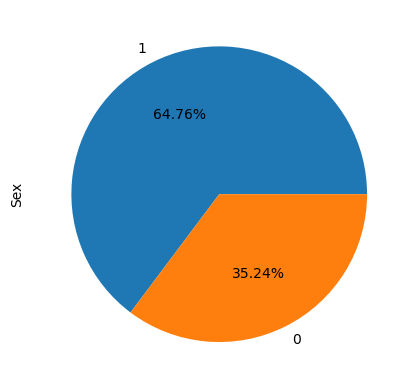

In [42]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f%%')

3    491
1    216
2    184
Name: Pclass, dtype: int64

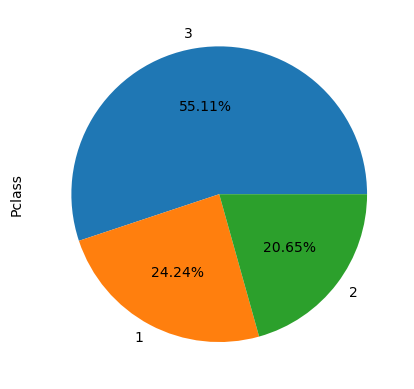

In [43]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f%%')
df['Pclass'].value_counts()

# 2. Numerical Data

# a.Histogram
> the distributions of data in numericals columns

(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

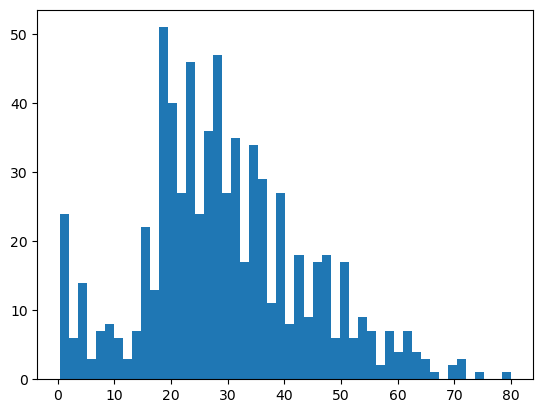

In [44]:
import matplotlib.pyplot as plt
plt.hist(df['Age'],bins=50)

# b. Displot
> the improvement of histograms

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

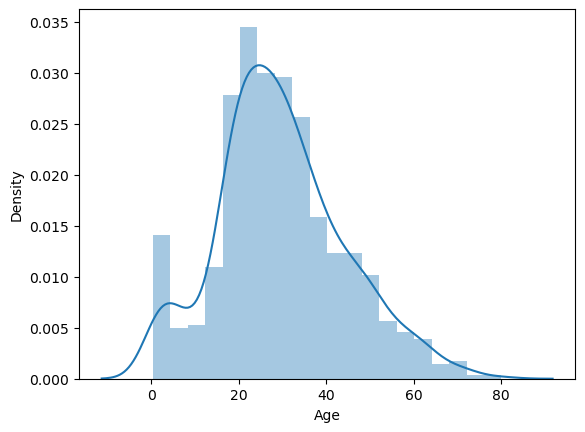

In [45]:
# Here blue line represent KDE (kernnel density estimations)
# Here curve represents data distributions PDF(probability density functions)
sns.distplot(df['Age']) 

# c. Boxplot
> 5 numbers gives summary data and show the outlires

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

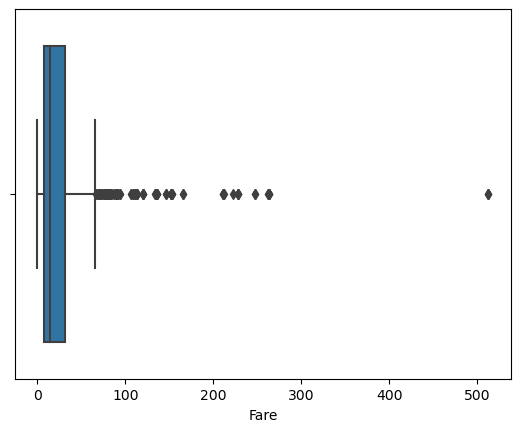

In [46]:
sns.boxplot(df['Fare'])

In [47]:
df['Age'].fillna(method='ffill',inplace=True)

In [48]:
df['Age'].isnull().sum()

0

In [49]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [50]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

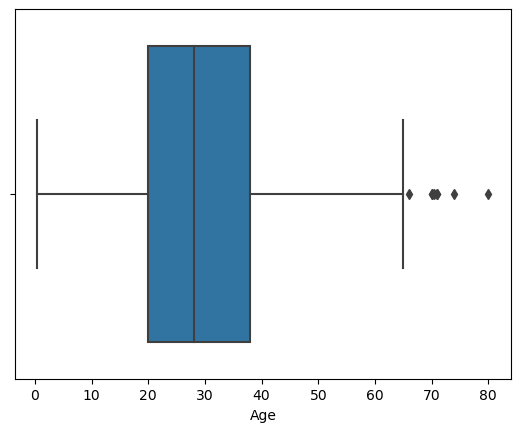

In [51]:
sns.boxplot(df['Age'])

In [52]:
 df['Age'].min()

0.42

In [53]:
# Find the skewness a perticular columns

In [54]:
df['Age'].skew()

0.32738170696022845

In [55]:
df.skew()

C:\Users\Amarendra Kumar\AppData\Local\Temp\ipykernel_13248\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.327382
SibSp          3.695352
Parch          2.749117
Fare           4.787317
seat_number    4.885372
dtype: float64

<AxesSubplot:>

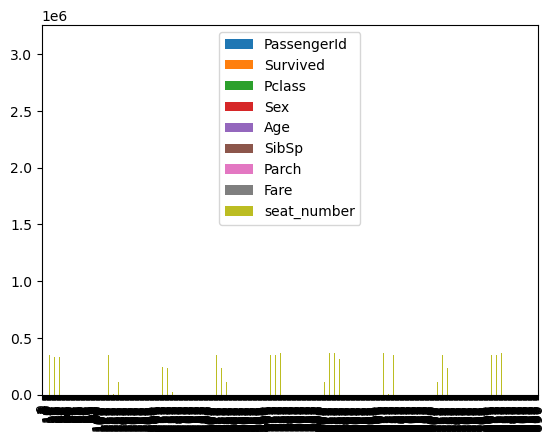

In [56]:
df.plot(kind="bar")

# multi varients

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Coach_number,seat_number,coach,titel,sur_name,midel_name
0,1,0,3,"Braund, Mr. Owen",1,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,113803,A/5,"Braund,",Mr.,Owen
1,2,1,1,"Cumings, Mrs. John",0,38.0,1,0,PC 17599,71.2833,C85,C,PC,113803,PC,"Cumings,",Mrs.,John
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,113803,STON/O2.,"Heikkinen,",Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques",0,35.0,1,0,113803,53.1000,C123,S,113803,113803,STON/O2.,"Futrelle,",Mrs.,Jacques
4,5,0,3,"Allen, Mr. William",1,35.0,0,0,373450,8.0500,NaN,S,373450,373450,STON/O2.,"Allen,",Mr.,William


In [59]:
df1=sns.load_dataset('tips')
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
df3=sns.load_dataset('iris')
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1.sactterplot (numerical to numerical)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

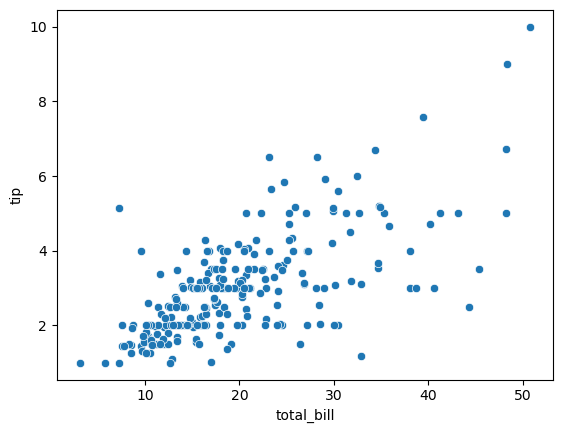

In [61]:
# Bivarients
# liear relations
sns.scatterplot(df1['total_bill'],df1['tip'])

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

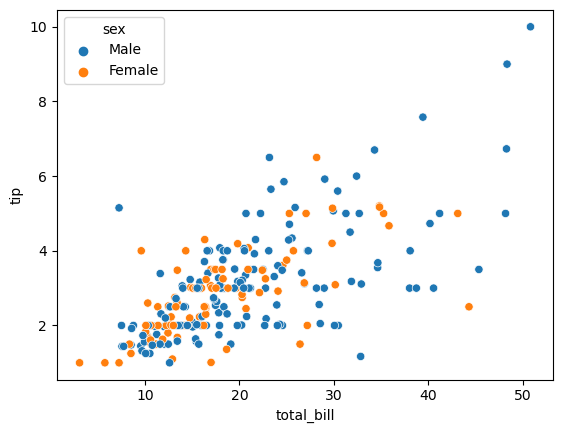

In [62]:
# multivarients
sns.scatterplot(x='total_bill',y='tip',hue='sex',data=df1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

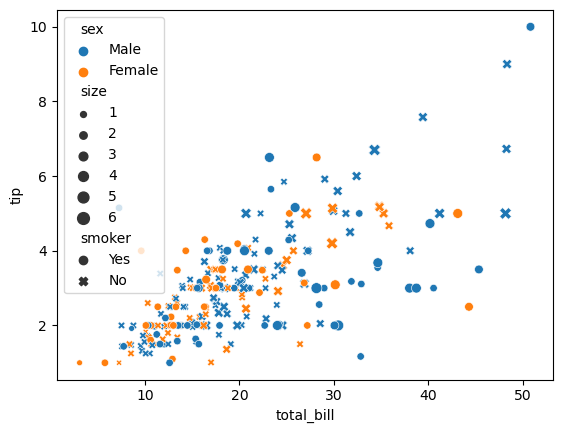

In [63]:
sns.scatterplot(df1['total_bill'],df1['tip'],hue=df1['sex'],style=df1['smoker'],size=df1['size'])

# 2. Bar plot (Numerical-Categorical)

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Coach_number,seat_number,coach,titel,sur_name,midel_name
0,1,0,3,"Braund, Mr. Owen",1,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,113803,A/5,"Braund,",Mr.,Owen
1,2,1,1,"Cumings, Mrs. John",0,38.0,1,0,PC 17599,71.2833,C85,C,PC,113803,PC,"Cumings,",Mrs.,John
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,113803,STON/O2.,"Heikkinen,",Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques",0,35.0,1,0,113803,53.1000,C123,S,113803,113803,STON/O2.,"Futrelle,",Mrs.,Jacques
4,5,0,3,"Allen, Mr. William",1,35.0,0,0,373450,8.0500,NaN,S,373450,373450,STON/O2.,"Allen,",Mr.,William


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

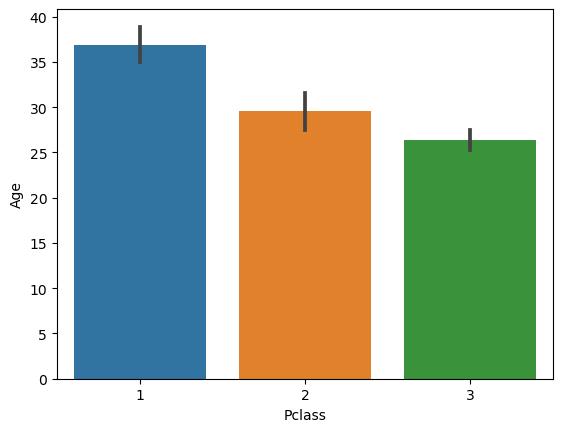

In [66]:
sns.barplot(df['Pclass'],df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

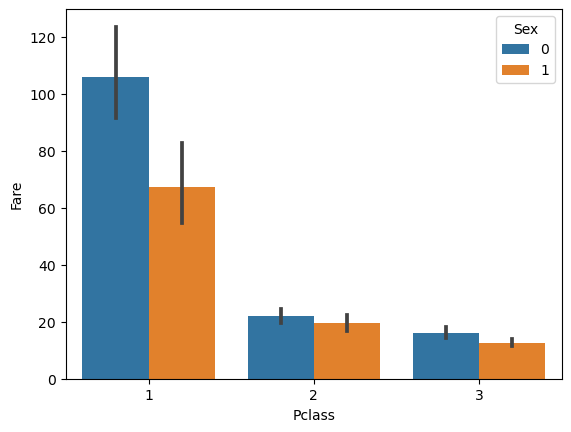

In [67]:
sns.barplot(df['Pclass'],df['Fare'],hue=df['Sex'])

# 3. Box plot (numerical - categorical)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

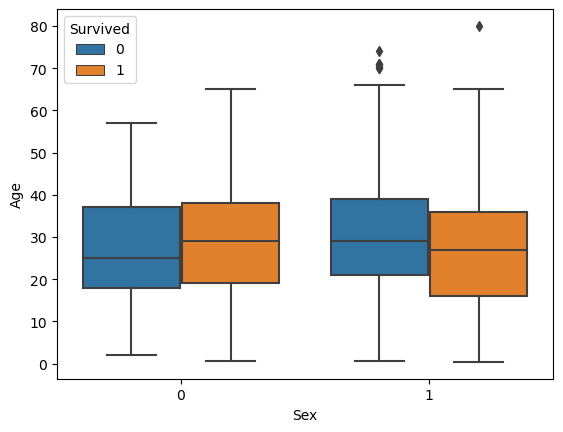

In [68]:
sns.boxplot(df['Sex'],df['Age'],hue=df['Survived'])

# 4.Displot(Numerical - Categorical)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

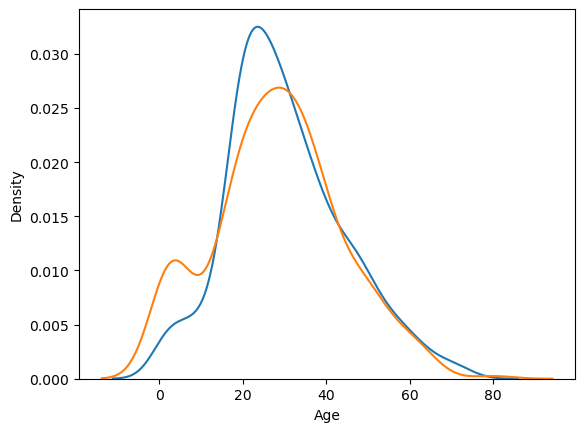

In [69]:
sns.distplot(df[df['Survived']==0]['Age'],hist=False)
sns.distplot(df[df['Survived']==1]['Age'],hist=False)                                  

# 4. HeatMap (Categorical - Categorical)

In [79]:
sns.heatmap(df['Pclass'],df['Survived'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: Inconsistent shape between the condition and the input (got (891, 1) and (891,))

In [65]:
df.groupby('Pclass').mean()['Survived']*100    ## show the percentage

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [82]:
df.groupby('Pclass')['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [87]:
def stats(number):
    return {
        'mean':np.mean(number)
        "median":sorted(np.median(number))
        'stdev':np.std(number)}
stats(df['Survived'])

SyntaxError: invalid syntax (119283804.py, line 4)

# Pairplot

In [88]:
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


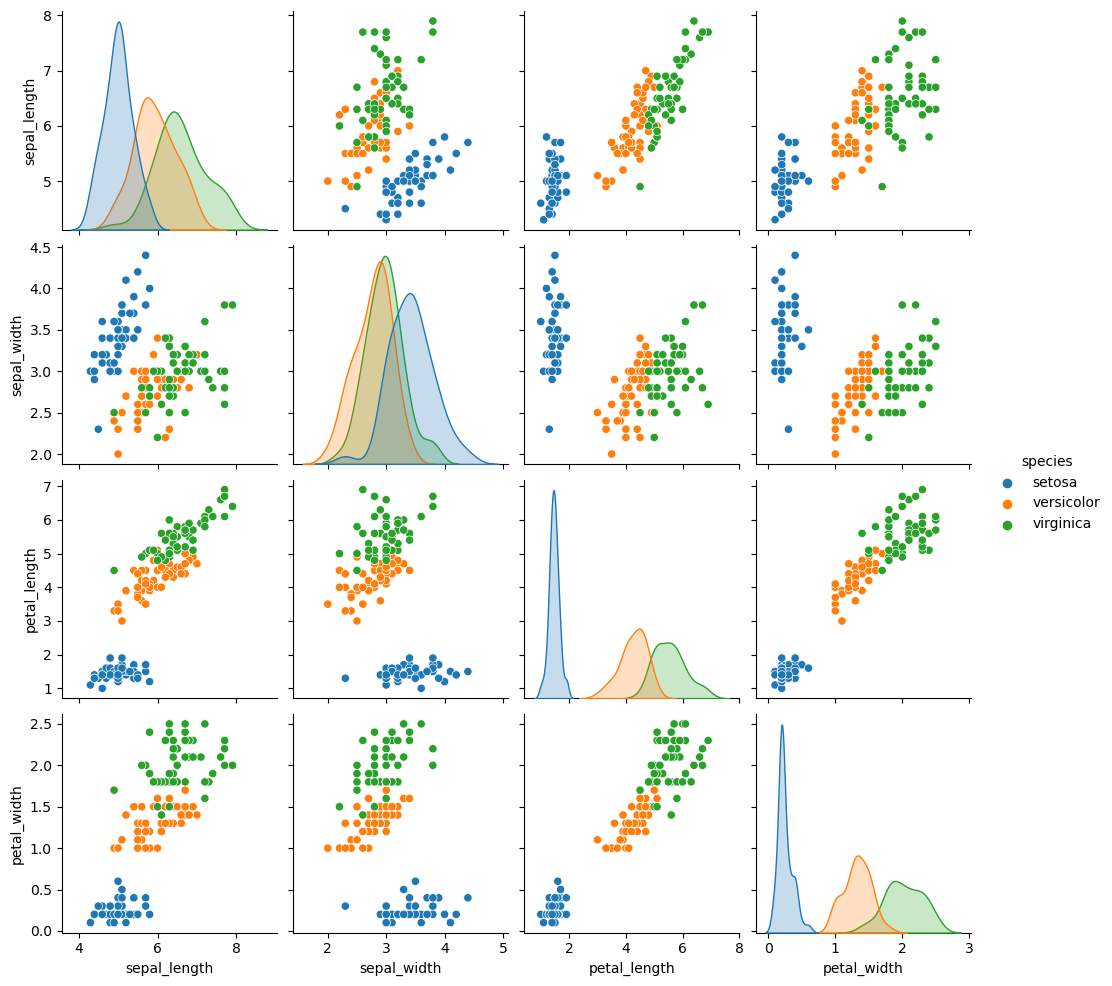

In [89]:
sns.pairplot(df3,hue='species')

In [90]:
!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable


In [91]:
# very very important
from pandas_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file='output.html')

C:\Users\Amarendra Kumar\AppData\Local\Temp\ipykernel_13248\2771177872.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature scalling
1. Standarizations
2. Normalization

# 1. Standarizations

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df =pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [94]:
df1=df.iloc[:,2:]    # df.drop(['User ID','Gender'],axis=1)   both are the same
df1.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Train test split

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Purchased', axis=1),df1['Purchased'],test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
scaler.fit(X_train)

StandardScaler()

In [98]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [99]:
X_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [100]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [101]:
X_train.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [102]:
X_test.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [103]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [104]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [105]:
X_test_scaled.head()

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804


In [106]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [107]:
np.round(X_train_scaled.describe(), 1)  # here sd 1

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

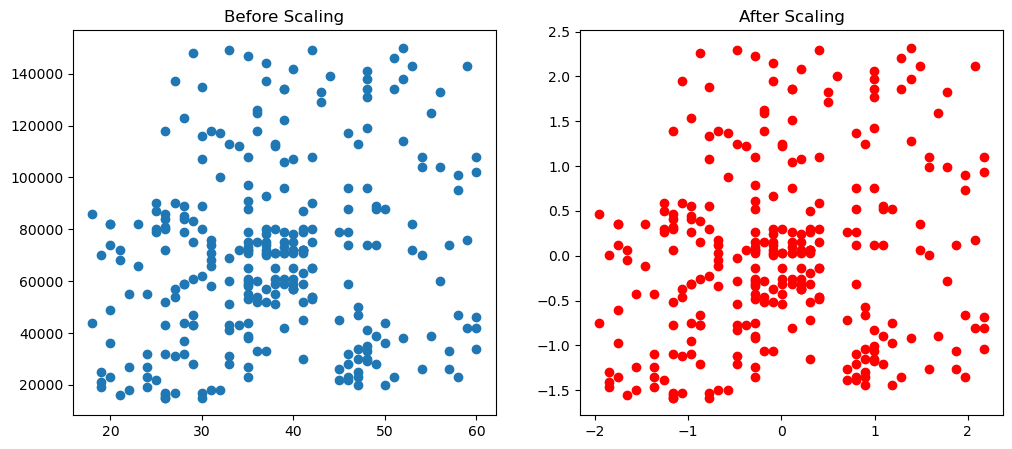

In [108]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

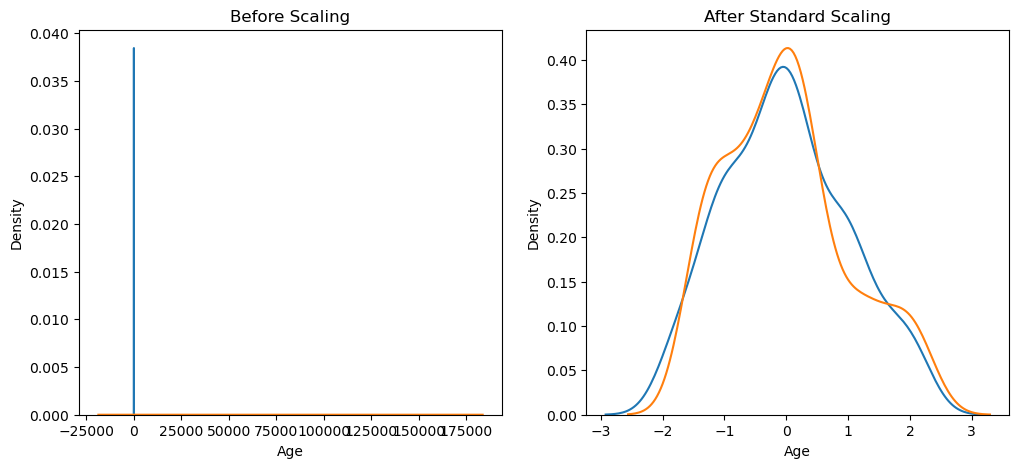

In [109]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

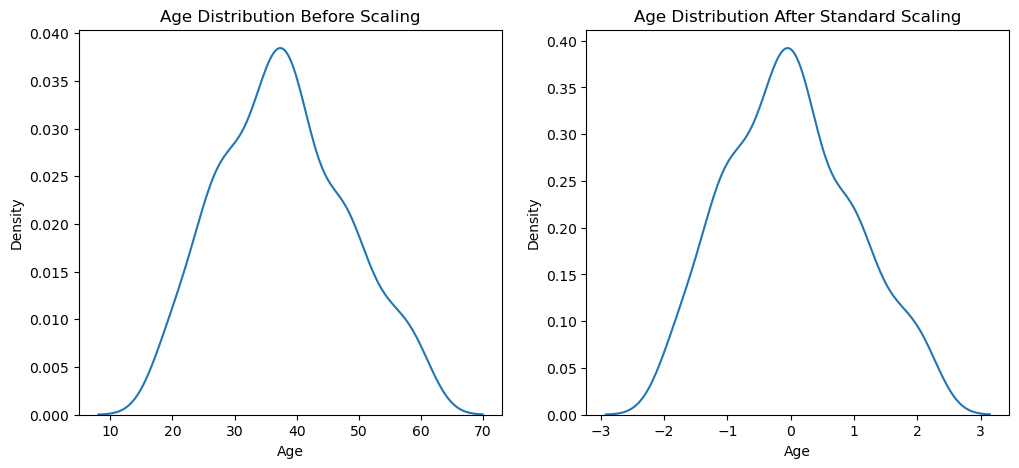

In [110]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

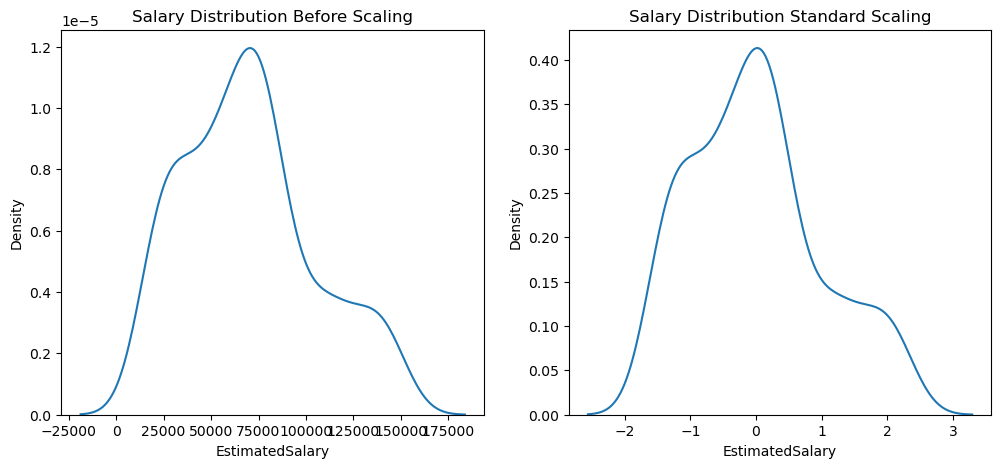

In [111]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()


# Why scaling is important?

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
lr = LogisticRegression()       # model without scalling data
lr_scaled = LogisticRegression() # model with scalling data

In [114]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [115]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [120]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [121]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [122]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.8666666666666667


In [123]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Effect of Outlier

In [132]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)
df.head()

C:\Users\Amarendra Kumar\AppData\Local\Temp\ipykernel_13248\2682321839.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,0.0,19,19000,0
1,15810944.0,0.0,35,20000,0
2,15668575.0,0.0,26,43000,0
3,15603246.0,0.0,27,57000,0
4,15804002.0,0.0,19,76000,0


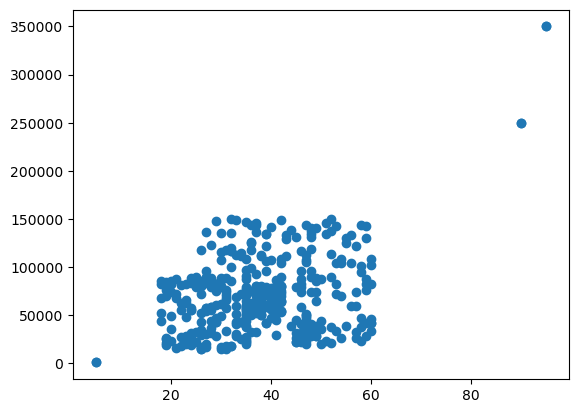

In [133]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((284, 4), (122, 4))

In [135]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,0.0,19,19000,0
1,15810944.0,0.0,35,20000,0
2,15668575.0,0.0,26,43000,0
3,15603246.0,0.0,27,57000,0
4,15804002.0,0.0,19,76000,0


In [136]:
df['Gender']=np.where(df['Gender'].isin(['Male']),1,0)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,0,19,19000,0
1,15810944.0,0,35,20000,0
2,15668575.0,0,26,43000,0
3,15603246.0,0,27,57000,0
4,15804002.0,0,19,76000,0


In [137]:
# df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
# df.head()

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

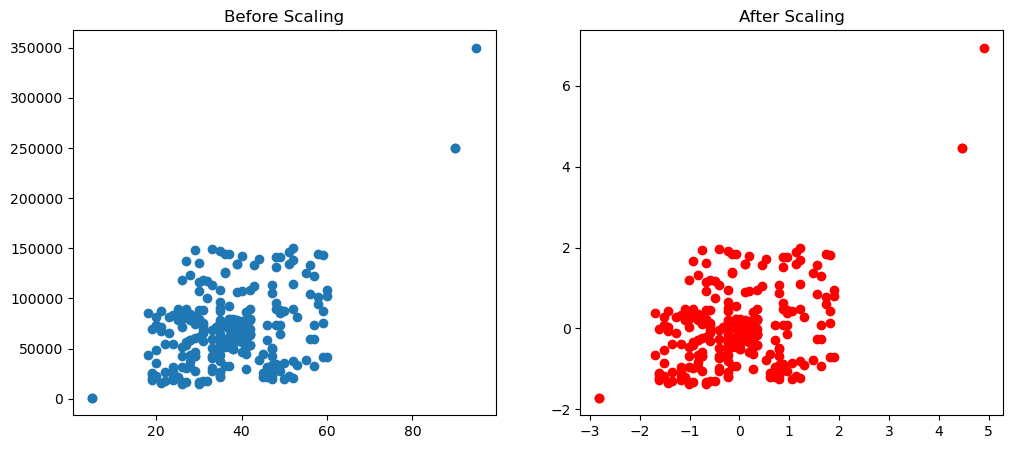

In [140]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

# Normalizations 

In [141]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

FileNotFoundError: [Errno 2] No such file or directory: 'wine_data.csv'

In [143]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,0,19,19000,0
1,15810944.0,0,35,20000,0
2,15668575.0,0,26,43000,0
3,15603246.0,0,27,57000,0
4,15804002.0,0,19,76000,0


In [144]:
sns.kdeplot(df['Alcohol'])

KeyError: 'Alcohol'

In [145]:
sns.kdeplot(df['Malic acid'])

KeyError: 'Malic acid'

In [146]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)

KeyError: 'Alcohol'

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

KeyError: "['Class label'] not found in axis"

In [148]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [155]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [156]:
np.round(X_train.describe(), 1)

,User ID,Gender,Age,EstimatedSalary
count,279.0,281.0,284.0,284.0
mean,15691055.3,0.0,37.8,70151.4
std,71619.5,0.0,11.7,40385.2
min,15566689.0,0.0,5.0,1000.0
25%,15628479.5,0.0,30.0,43000.0
50%,15694879.0,0.0,37.0,68000.0
75%,15750391.0,0.0,45.0,86000.0
max,15814816.0,0.0,95.0,350000.0


In [157]:
np.round(X_train_scaled.describe(),1)

,User ID,Gender,Age,EstimatedSalary
count,279.0,281.0,284.0,284.0
mean,0.5,0.0,0.4,0.2
std,0.3,0.0,0.1,0.1
min,0.0,0.0,0.0,0.0
25%,0.2,0.0,0.3,0.1
50%,0.5,0.0,0.4,0.2
75%,0.7,0.0,0.4,0.2
max,1.0,0.0,1.0,1.0


KeyError: 'Alcohol'

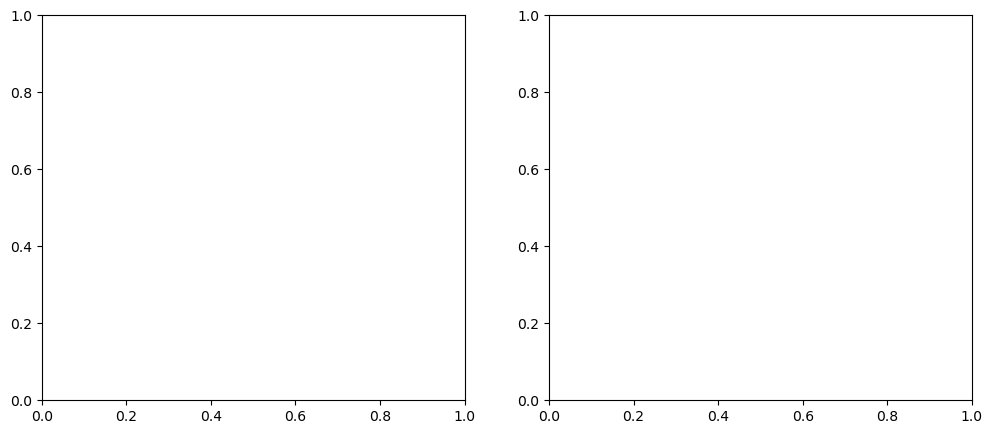

In [158]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

KeyError: 'Alcohol'

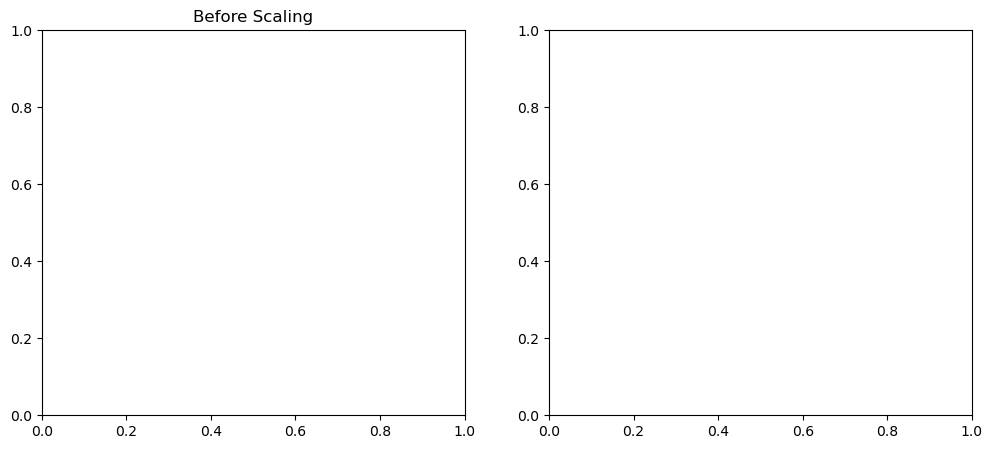

In [159]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

KeyError: 'Alcohol'

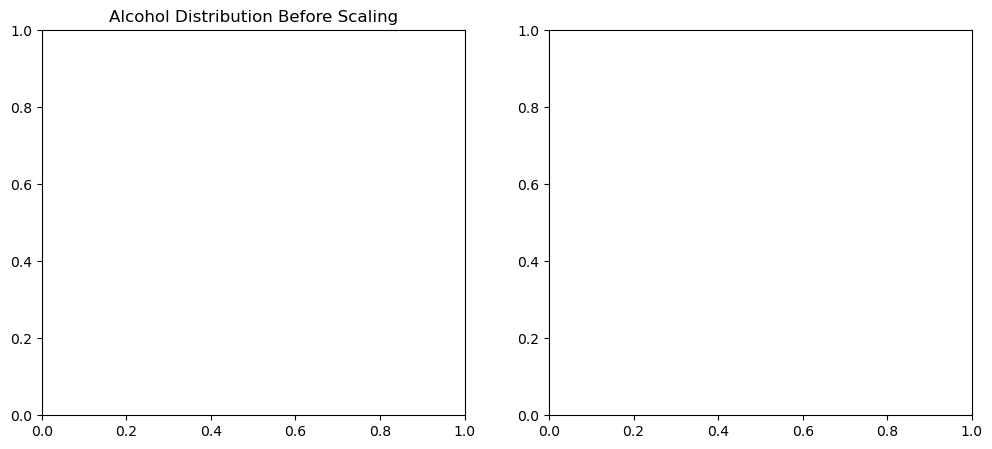

In [160]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

# Function Transformer 

In [161]:
# log Transformer

import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [162]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [163]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [164]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [165]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [166]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [167]:
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [168]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


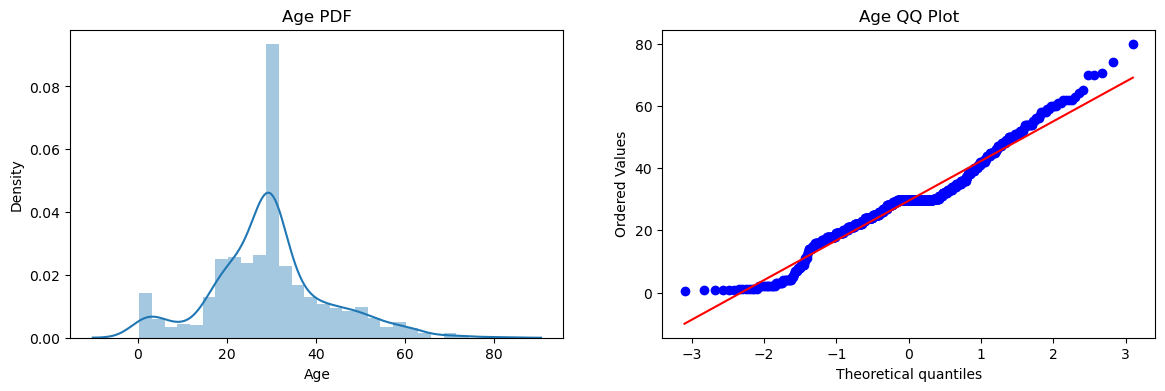

In [170]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


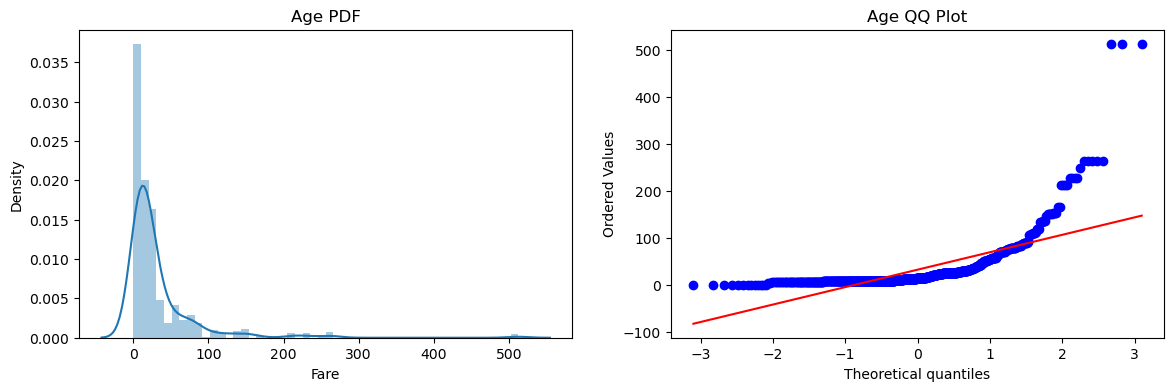

In [171]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [172]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [173]:
# without transformation Accuracy of both model
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [180]:
# transform the features
trf = FunctionTransformer(func=np.log1p)

In [181]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [182]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


In [183]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6588764044943821


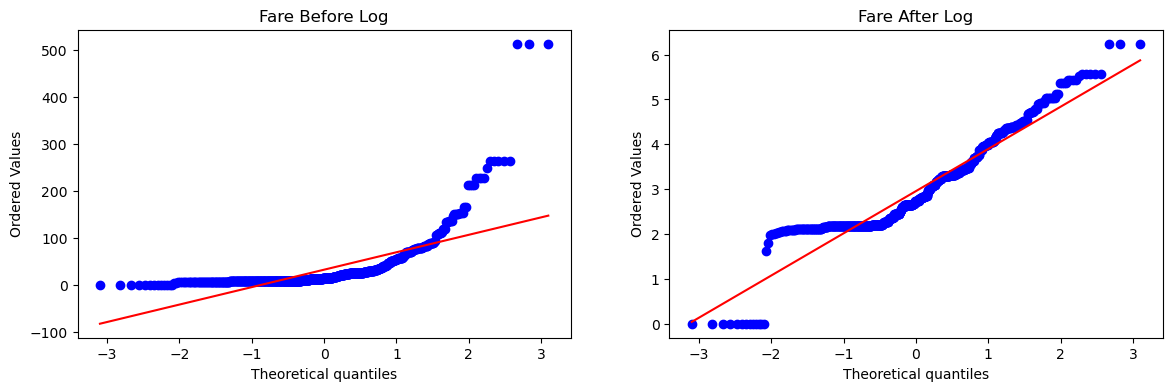

In [184]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

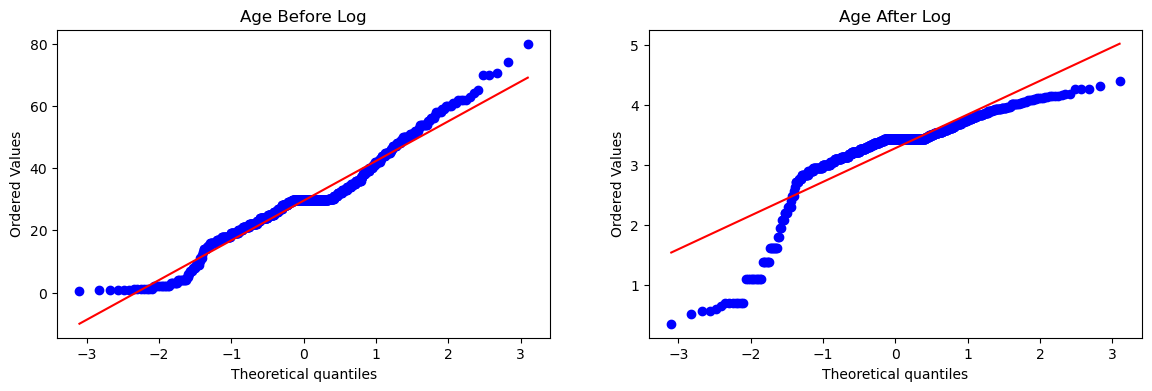

In [185]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [186]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [187]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [188]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6588514357053683


In [189]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6195131086142323


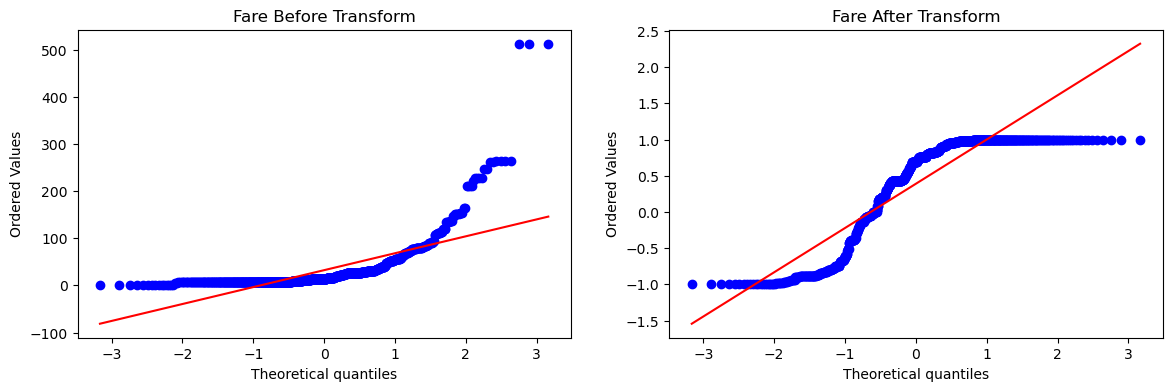

In [190]:
apply_transform(np.sin)

# Numerical to categorical columns converted

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [192]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [193]:
df.dropna(inplace=True)

In [194]:
df.shape

(714, 3)

In [195]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [196]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [197]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [198]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [199]:
clf = DecisionTreeClassifier()

In [200]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [201]:
accuracy_score(y_test,y_pred)

0.6433566433566433

In [202]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6330985915492957

In [203]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [204]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [205]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [206]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [207]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [208]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [209]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [210]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
383,35.0,10.0,52.000,12.0,"(32.0, 35.0]","(51.479, 76.292]"
35,42.0,12.0,52.000,12.0,"(38.0, 42.0]","(51.479, 76.292]"
805,31.0,8.0,7.775,2.0,"(30.0, 32.0]","(7.25, 7.775]"
657,32.0,9.0,15.500,7.0,"(30.0, 32.0]","(14.454, 18.75]"
799,30.0,8.0,24.150,8.0,"(28.0, 30.0]","(18.75, 26.0]"


In [211]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [212]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [213]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6303403755868543

In [214]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

In [215]:
discretize(5,'kmeans')

AttributeError: 'NoneType' object has no attribute 'split'

#  Handling Mixed  Variables

In [216]:
import numpy as np
import pandas as pd

In [217]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day33-handling-mixed-variables/titanic.csv')

In [218]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [219]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

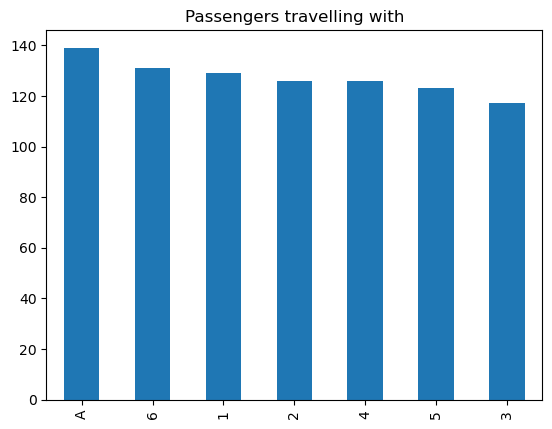

In [220]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [221]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [222]:
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [223]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [224]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [225]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<AxesSubplot:>

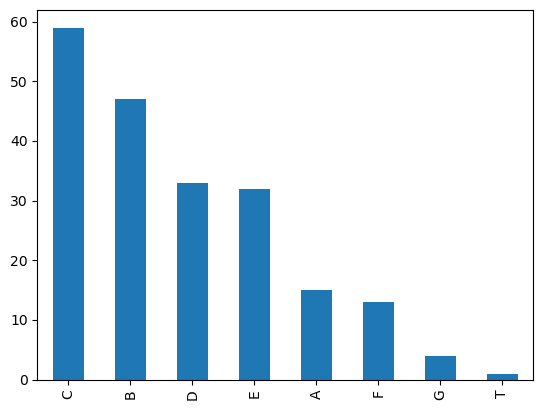

In [226]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [227]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],errors='coerce',downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,df['ticket_cat'])

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN


In [228]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

# Handling Date and Time  columns

In [229]:
import numpy as np
import pandas as pd

In [230]:
date = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day34-handling-date-and-time/orders.csv')
time = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day34-handling-date-and-time/messages.csv')

In [231]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [232]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [233]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [234]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


# Working with Dates

In [235]:
# Converting to datetime datatype
date['date'] = pd.to_datetime(date['date'])

In [236]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [237]:
date['date'].dt.month_name()   # dt.year,, df.day, dt.month

0      December
1        August
2       October
3        August
4       January
         ...   
995     October
996    December
997         May
998       March
999     October
Name: date, Length: 1000, dtype: object

In [238]:
# 1. Extract year
date['date_year'] = date['date'].dt.year

date.sample(5)

,date,product_id,city_id,orders,date_year
966,2019-11-17,5975,18,1,2019
259,2019-12-10,7246,13,1,2019
989,2019-02-20,438,22,28,2019
473,2019-05-15,1896,25,4,2019
605,2018-11-19,5452,26,12,2018


In [239]:
#2. Extract Month
date['date_month_no'] = date['date'].dt.month

date.head()

,date,product_id,city_id,orders,date_year,date_month_no
0,2019-12-10,5628,25,3,2019,12
1,2018-08-15,3646,14,157,2018,8
2,2018-10-23,1859,25,1,2018,10
3,2019-08-17,7292,25,1,2019,8
4,2019-01-06,4344,25,3,2019,1


In [240]:
date['date_month_name'] = date['date'].dt.month

date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name
0,2019-12-10,5628,25,3,2019,12,12
1,2018-08-15,3646,14,157,2018,8,8
2,2018-10-23,1859,25,1,2018,10,10
3,2019-08-17,7292,25,1,2019,8,8
4,2019-01-06,4344,25,3,2019,1,1


In [241]:
date['date_month_name'] = date['date'].dt.month_name()

date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name
0,2019-12-10,5628,25,3,2019,12,December
1,2018-08-15,3646,14,157,2018,8,August
2,2018-10-23,1859,25,1,2018,10,October
3,2019-08-17,7292,25,1,2019,8,August
4,2019-01-06,4344,25,3,2019,1,January


In [242]:
#Extract Days
date['date_day'] = date['date'].dt.day

date.head()


,date,product_id,city_id,orders,date_year,date_month_no,date_month_name,date_day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23
3,2019-08-17,7292,25,1,2019,8,August,17
4,2019-01-06,4344,25,3,2019,1,January,6


In [243]:
date['date_day'] = date['date'].dt.day_name()

date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name,date_day
0,2019-12-10,5628,25,3,2019,12,December,Tuesday
1,2018-08-15,3646,14,157,2018,8,August,Wednesday
2,2018-10-23,1859,25,1,2018,10,October,Tuesday
3,2019-08-17,7292,25,1,2019,8,August,Saturday
4,2019-01-06,4344,25,3,2019,1,January,Sunday


In [244]:
# day of week
date['date_dow'] = date['date'].dt.dayofweek

date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name,date_day,date_dow
0,2019-12-10,5628,25,3,2019,12,December,Tuesday,1
1,2018-08-15,3646,14,157,2018,8,August,Wednesday,2
2,2018-10-23,1859,25,1,2018,10,October,Tuesday,1
3,2019-08-17,7292,25,1,2019,8,August,Saturday,5
4,2019-01-06,4344,25,3,2019,1,January,Sunday,6


In [245]:
# day of week - name

date['date_dow_name'] = date['date'].dt.day_name()

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name
0,2019-12-10,2019,12,December,Tuesday,1,Tuesday
1,2018-08-15,2018,8,August,Wednesday,2,Wednesday
2,2018-10-23,2018,10,October,Tuesday,1,Tuesday
3,2019-08-17,2019,8,August,Saturday,5,Saturday
4,2019-01-06,2019,1,January,Sunday,6,Sunday


In [246]:
# is weekend?

date['date_is_weekend'] = np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend
0,2019-12-10,2019,12,December,Tuesday,1,Tuesday,0
1,2018-08-15,2018,8,August,Wednesday,2,Wednesday,0
2,2018-10-23,2018,10,October,Tuesday,1,Tuesday,0
3,2019-08-17,2019,8,August,Saturday,5,Saturday,1
4,2019-01-06,2019,1,January,Sunday,6,Sunday,1


In [247]:
#Extract week of the year
date['date_week'] = date['date'].dt.week

date.drop(columns=['product_id','city_id','orders']).head()

C:\Users\Amarendra Kumar\AppData\Local\Temp\ipykernel_13248\1217221593.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date['date_week'] = date['date'].dt.week


,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week
0,2019-12-10,2019,12,December,Tuesday,1,Tuesday,0,50
1,2018-08-15,2018,8,August,Wednesday,2,Wednesday,0,33
2,2018-10-23,2018,10,October,Tuesday,1,Tuesday,0,43
3,2019-08-17,2019,8,August,Saturday,5,Saturday,1,33
4,2019-01-06,2019,1,January,Sunday,6,Sunday,1,1


In [248]:
#Extract Quarter
date['quarter'] = date['date'].dt.quarter

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter
0,2019-12-10,2019,12,December,Tuesday,1,Tuesday,0,50,4
1,2018-08-15,2018,8,August,Wednesday,2,Wednesday,0,33,3
2,2018-10-23,2018,10,October,Tuesday,1,Tuesday,0,43,4
3,2019-08-17,2019,8,August,Saturday,5,Saturday,1,33,3
4,2019-01-06,2019,1,January,Sunday,6,Sunday,1,1,1


In [249]:
#Extract Semester
date['semester'] = np.where(date['quarter'].isin([1,2]), 1, 2)

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter,semester
0,2019-12-10,2019,12,December,Tuesday,1,Tuesday,0,50,4,2
1,2018-08-15,2018,8,August,Wednesday,2,Wednesday,0,33,3,2
2,2018-10-23,2018,10,October,Tuesday,1,Tuesday,0,43,4,2
3,2019-08-17,2019,8,August,Saturday,5,Saturday,1,33,3,2
4,2019-01-06,2019,1,January,Sunday,6,Sunday,1,1,1,1


In [250]:
#Extract Time elapsed between dates
import datetime

today = datetime.datetime.today()

today

datetime.datetime(2024, 1, 23, 9, 18, 16, 904121)

In [251]:
today - date['date']

0     1505 days 09:18:16.904121
1     1987 days 09:18:16.904121
2     1918 days 09:18:16.904121
3     1620 days 09:18:16.904121
4     1843 days 09:18:16.904121
                 ...           
995   1933 days 09:18:16.904121
996   1874 days 09:18:16.904121
997   1722 days 09:18:16.904121
998   1787 days 09:18:16.904121
999   1561 days 09:18:16.904121
Name: date, Length: 1000, dtype: timedelta64[ns]

In [252]:
(today - date['date']).dt.days

0      1505
1      1987
2      1918
3      1620
4      1843
       ... 
995    1933
996    1874
997    1722
998    1787
999    1561
Name: date, Length: 1000, dtype: int64

In [253]:
# Months passed

np.round((today -date['date']) / np.timedelta64(1, 'M'),0)

0      49.0
1      65.0
2      63.0
3      53.0
4      61.0
       ... 
995    64.0
996    62.0
997    57.0
998    59.0
999    51.0
Name: date, Length: 1000, dtype: float64

# Working with Time

In [254]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [255]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])

In [256]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [257]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


In [258]:
#Extract Time part

time['time'] = time['date'].dt.time

time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


In [259]:
#Time difference

today - time['date']

0     3691 days 08:28:16.904121
1     3555 days 09:38:16.904121
2     4041 days 08:57:16.904121
3     3343 days 08:47:16.904121
4     3740 days 10:07:16.904121
                 ...           
995   4330 days 08:28:16.904121
996   3651 days 10:04:16.904121
997   4116 days 09:41:16.904121
998   4232 days 09:44:16.904121
999   3504 days 09:53:16.904121
Name: date, Length: 1000, dtype: timedelta64[ns]

In [260]:
# in seconds

(today - time['date'])/np.timedelta64(1,'s')

0      3.189329e+08
1      3.071867e+08
2      3.491746e+08
3      2.888668e+08
4      3.231724e+08
           ...     
995    3.741425e+08
996    3.154827e+08
997    3.556573e+08
998    3.656799e+08
999    3.027812e+08
Name: date, Length: 1000, dtype: float64

In [261]:
# in minutes

(today - time['date'])/np.timedelta64(1,'m')

0      5.315548e+06
1      5.119778e+06
2      5.819577e+06
3      4.814447e+06
4      5.386207e+06
           ...     
995    6.235708e+06
996    5.258044e+06
997    5.927621e+06
998    6.094664e+06
999    5.046353e+06
Name: date, Length: 1000, dtype: float64

In [262]:
# in hours

(today - time['date'])/np.timedelta64(1,'h')

0       88592.471362
1       85329.638029
2       96992.954696
3       80240.788029
4       89770.121362
           ...      
995    103928.471362
996     87634.071362
997     98793.688029
998    101577.738029
999     84105.888029
Name: date, Length: 1000, dtype: float64

# Handle Missing Values

# 1. Remove Values

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [264]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv')

In [265]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [266]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [267]:
df.shape

(19158, 13)

In [268]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [269]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
18591,0.920,no_enrollment,Graduate,11.0,15.0
6210,0.910,no_enrollment,Masters,11.0,68.0
2970,0.926,no_enrollment,NaN,0.0,76.0
9668,0.624,no_enrollment,Graduate,4.0,3.0
317,0.804,no_enrollment,Phd,20.0,206.0


In [270]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [271]:
len(df)

19158

In [272]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [273]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

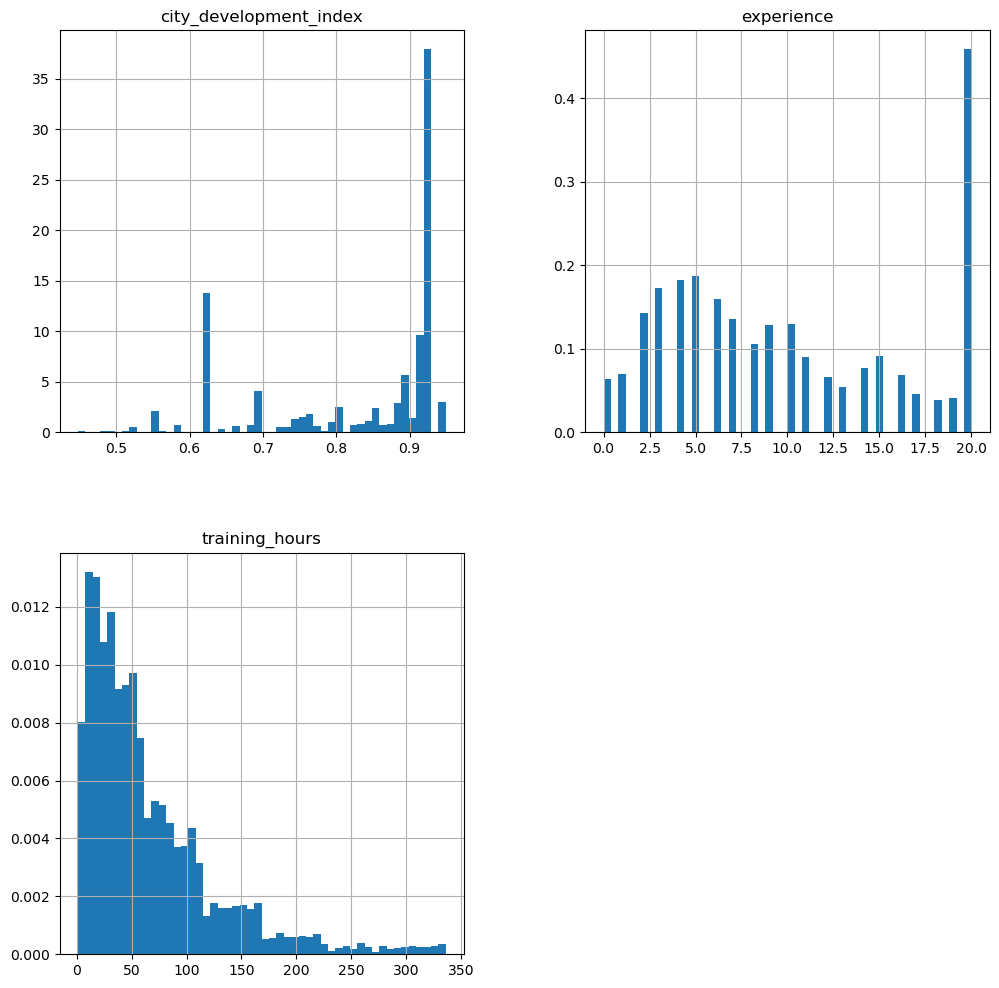

In [274]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<AxesSubplot:>

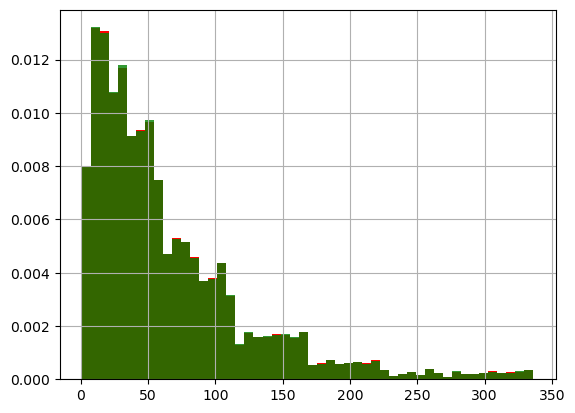

In [275]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

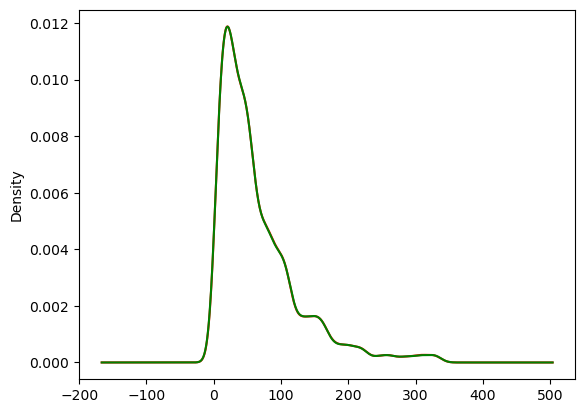

In [276]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<AxesSubplot:>

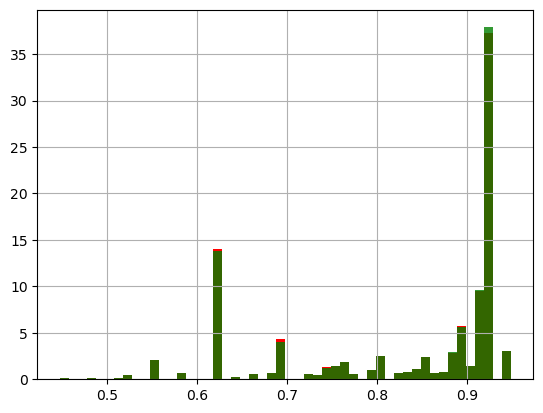

In [277]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

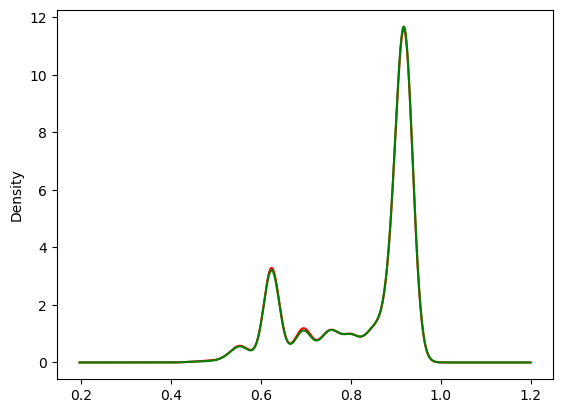

In [278]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<AxesSubplot:>

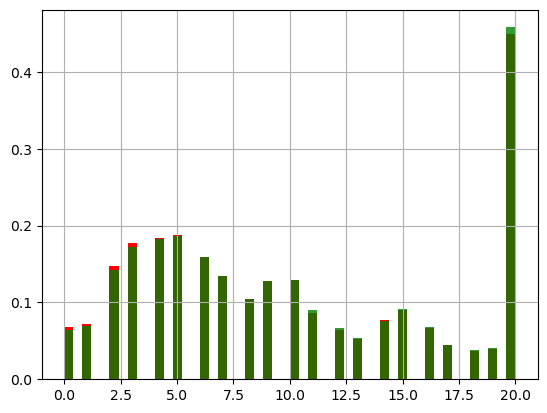

In [279]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

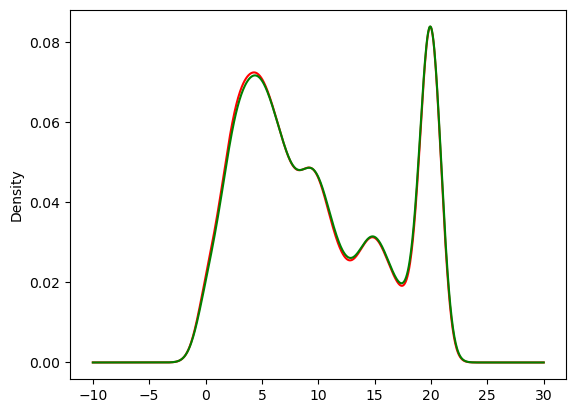

In [280]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [281]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [282]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


# 2.Univariant

# Categorical Missing Values

In [283]:
# Most Frequent values(mode)

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [285]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day37-handling-missing-categorical-data/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [286]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [287]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<AxesSubplot:>

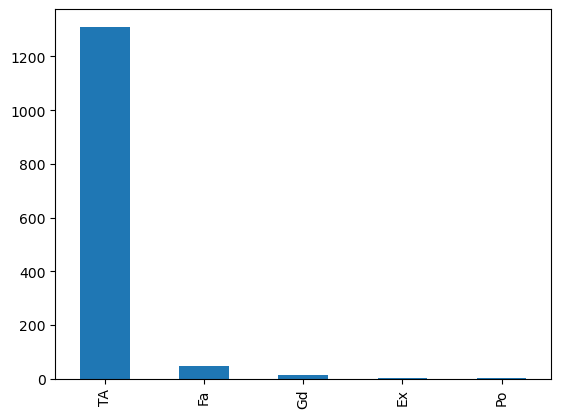

In [288]:
df['GarageQual'].value_counts().plot(kind='bar')

In [289]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

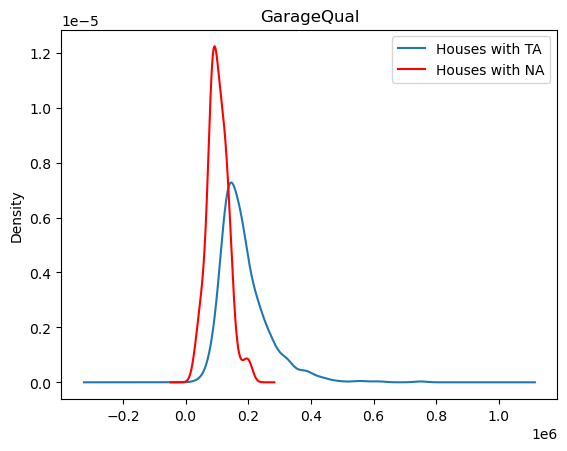

In [290]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [291]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [292]:
df['GarageQual'].fillna('TA', inplace=True)

<AxesSubplot:>

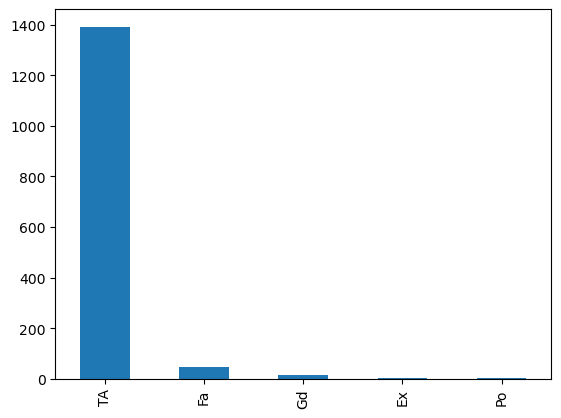

In [293]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

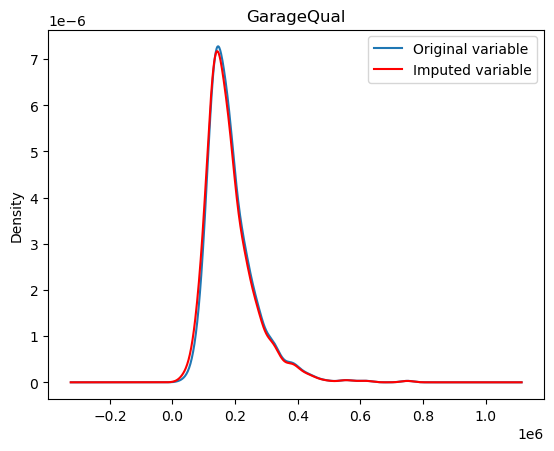

In [294]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<AxesSubplot:>

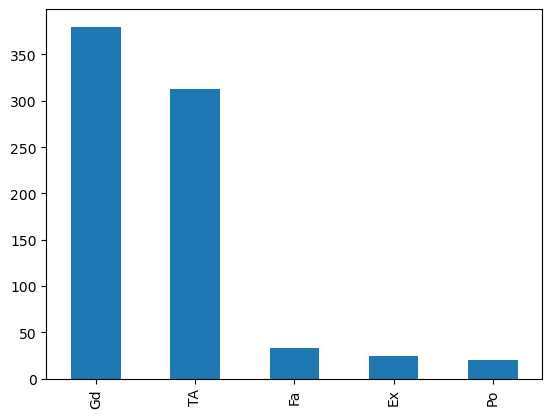

In [295]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [296]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

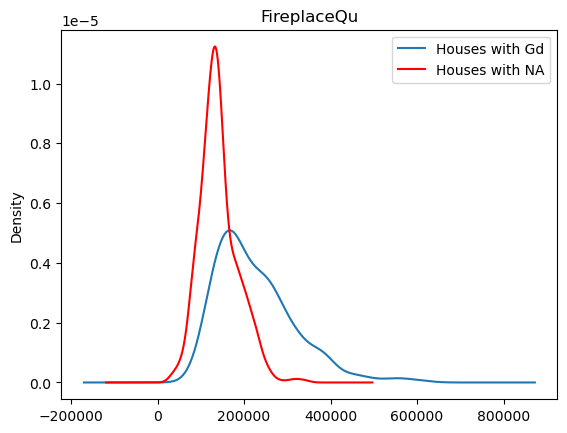

In [297]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')


In [298]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [299]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<AxesSubplot:>

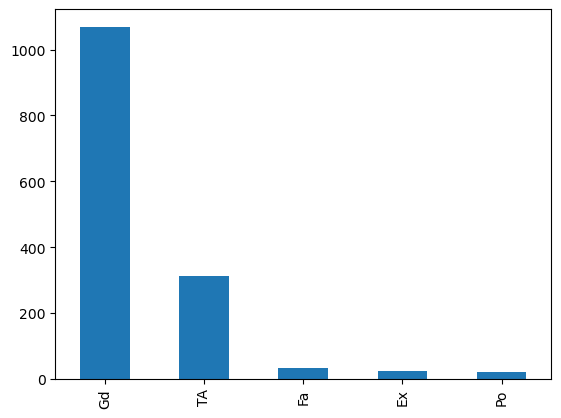

In [300]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

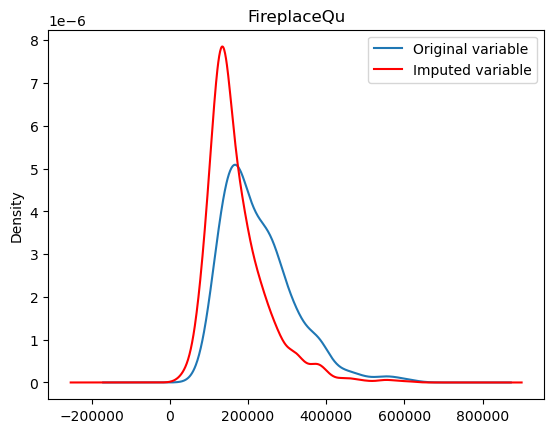

In [301]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [302]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [303]:
from sklearn.impute import SimpleImputer

In [304]:
imputer = SimpleImputer(strategy='most_frequent')

In [305]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [306]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

In [307]:
# Missing Category

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [309]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day37-handling-missing-categorical-data/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [310]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [311]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

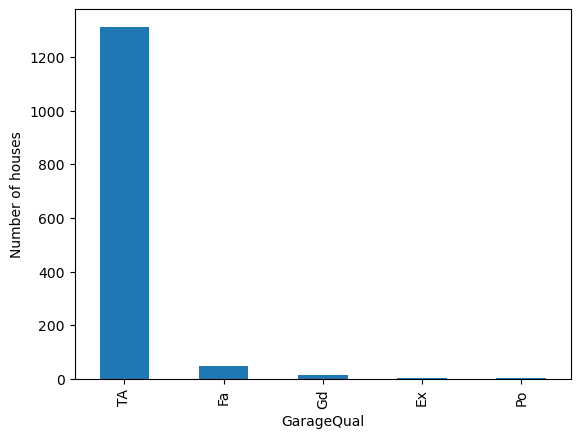

In [312]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [313]:
df['GarageQual'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

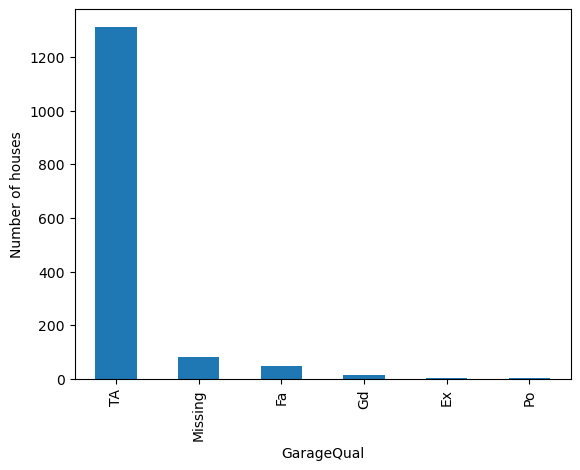

In [314]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [315]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [316]:
from sklearn.impute import SimpleImputer

In [317]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [318]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [319]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

# Special tech Univariant  Missing Values

# Random Value Imputation(both numerical and categorical)

In [320]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [322]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [323]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [324]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [325]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [326]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [327]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [328]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [329]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [330]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([25.  ,  2.  , 18.  , 40.  , 21.  , 27.  , 17.  , 22.  , 25.  ,
       43.  ,  9.  , 41.  , 30.5 ,  4.  , 58.  , 18.  , 35.  ,  5.  ,
       19.  , 33.  , 18.  , 24.  , 21.  , 45.  , 39.  , 65.  , 30.  ,
       25.  , 26.  , 40.  , 15.  , 54.  , 25.  , 30.  , 33.  , 36.  ,
       38.  , 19.  , 20.  ,  2.  ,  4.  , 16.  , 48.  , 65.  , 22.  ,
       17.  , 22.  , 24.  , 71.  , 33.  , 39.  , 66.  , 27.  , 18.  ,
       18.  , 34.  , 51.  , 45.  , 40.  , 29.  , 63.  , 54.  , 46.  ,
        9.  , 26.  ,  8.  , 39.  ,  3.  , 33.  , 18.  , 18.  , 22.  ,
       38.  , 24.  , 24.  , 29.  , 30.  , 20.  , 58.  , 50.  , 46.  ,
       21.  , 30.  , 36.  , 37.  , 34.  ,  3.  , 28.  , 40.  , 45.  ,
       24.  , 19.  , 19.  , 22.  , 22.  , 21.  , 34.  , 31.  , 30.  ,
       25.  , 32.  , 24.  , 24.  , 36.  , 24.  , 52.  , 47.  ,  7.  ,
        4.  ,  0.83, 34.5 , 45.  , 40.  , 34.  , 54.  , 29.  , 19.  ,
       24.  , 47.  , 58.  , 38.  , 13.  , 22.  , 28.  , 38.  , 33.  ,
       30.  , 32.5 ,

In [331]:
X_train['Age'].isnull().sum()

148

In [332]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,50.0
493,71.0,49.5042,71.0
527,NaN,221.7792,53.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


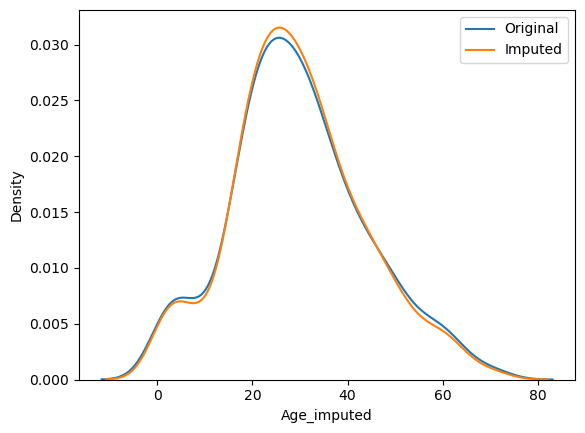

In [333]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label ='Imputed',hist=False)

plt.legend()
plt.show()

In [334]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  193.54251520073808


In [335]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,61.569513
Age,71.512440,204.349513,204.349513
Age_imputed,61.569513,204.349513,193.542515


<AxesSubplot:>

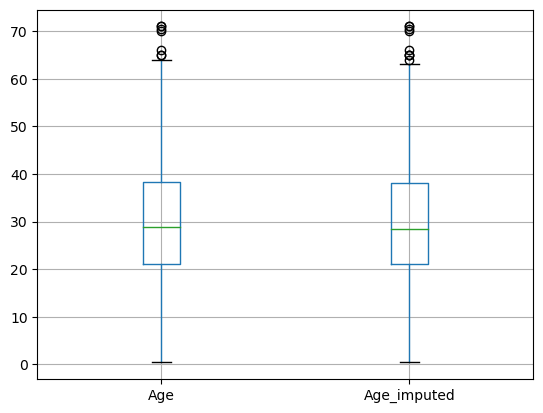

In [336]:
X_train[['Age', 'Age_imputed']].boxplot()

In [337]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

In [338]:
# Categoabsrical 

In [339]:
data=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/house-train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [340]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [341]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [342]:
X = data
y = data['SalePrice']

In [343]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [344]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [345]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
718,TA,TA,341000,TA,TA
858,TA,TA,152000,TA,TA
295,NaN,TA,142500,TA,NaN
906,Gd,TA,255000,TA,Gd
1317,Gd,TA,208900,TA,Gd


In [346]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Amarendra Kumar\AppData\Local\Temp\ipykernel_13248\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Amarendra Kumar\AppData\Local\Temp\ipykernel_13248\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\Amarendra Kumar\AppData\Local\Temp\ipykernel_13248\856878696.py:4:

In [428]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [429]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [430]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.644220
TA,0.412439,0.540965
Fa,0.040917,0.053872
Po,0.027823,0.038159
Ex,0.024550,0.033670


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

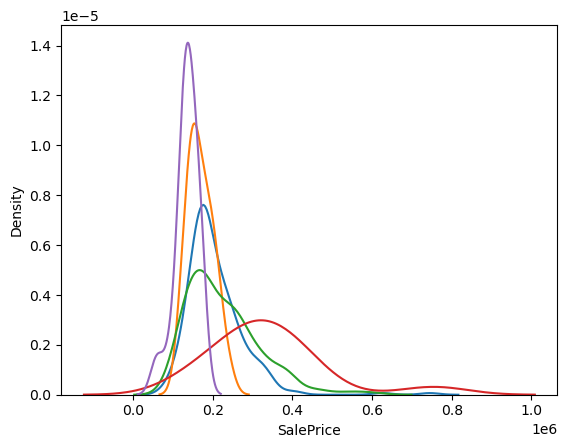

In [431]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

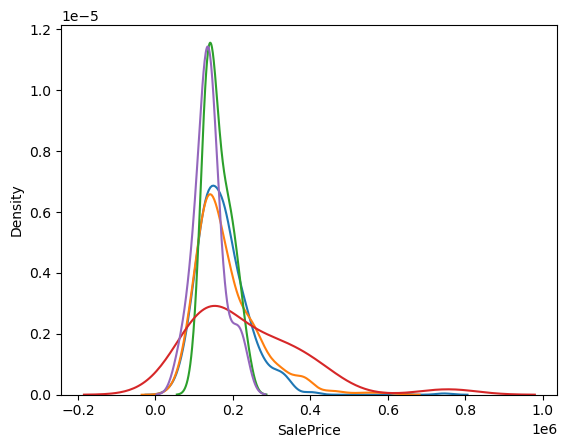

In [432]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

# automatic-select-imputer-parameters

In [433]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [436]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [437]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [438]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [439]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [440]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [441]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [442]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [443]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [444]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [445]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [446]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [447]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [448]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.787852
5,1.0,most_frequent,median,0.787852
6,1.0,constant,mean,0.787852
7,1.0,constant,median,0.787852
8,10,most_frequent,mean,0.787852
9,10,most_frequent,median,0.787852
10,10,constant,mean,0.787852
11,10,constant,median,0.787852
12,100,most_frequent,mean,0.787852
13,100,most_frequent,median,0.787852


# Multivariant
# 1. KNN Imputer

In [449]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [451]:
df = pd.read_csv('titanic.csv')[['Age','Pclass','Fare','Survived']]
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [452]:
df.isnull().mean() * 100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [453]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [454]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [455]:
X_train.head()

,Age,Pclass,Fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458


In [456]:
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [457]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7150837988826816

In [458]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [459]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978

# Outliers
# 1. Z-score

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')

In [250]:
df.shape

(1000, 3)

In [251]:
df.sample(5)

,cgpa,placement_exam_marks,placed
334,6.56,19.0,1
164,6.29,34.0,1
680,7.35,15.0,0
857,5.72,64.0,1
537,7.13,9.0,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


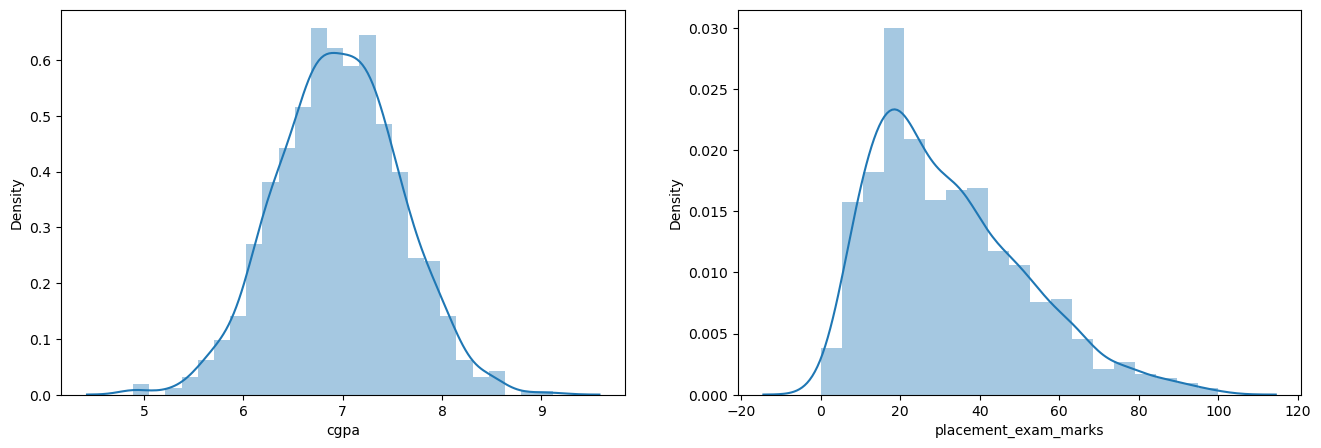

In [252]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [253]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [256]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [466]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124000000001
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [467]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397177
Lowest allowed 5.113546374602842


In [468]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [469]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [470]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [471]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [472]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [473]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [474]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [475]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [258]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [261]:
lower_limit,upper_limit

(5.113546374602842, 8.808933625397177)

In [262]:
np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa'])

array([5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354

In [265]:
np.where(df['cgpa']>upper_limit,upper_limit,df['cgpa'])

array([7.19      , 7.46      , 7.54      , 6.42      , 7.23      ,
       7.3       , 6.69      , 7.12      , 6.45      , 7.75      ,
       6.82      , 6.38      , 6.58      , 5.68      , 7.91      ,
       7.1       , 6.53      , 7.56      , 6.93      , 7.63      ,
       6.69      , 7.43      , 6.76      , 6.05      , 6.44      ,
       6.28      , 7.45      , 6.53      , 7.23      , 6.51      ,
       7.46      , 7.66      , 5.91      , 6.23      , 8.15      ,
       7.48      , 6.85      , 8.51      , 6.58      , 7.25      ,
       6.6       , 6.7       , 7.46      , 7.85      , 7.88      ,
       6.92      , 7.3       , 6.92      , 6.29      , 8.23      ,
       6.2       , 6.24      , 7.53      , 6.69      , 8.42      ,
       8.12      , 6.93      , 7.73      , 7.34      , 7.7       ,
       7.94      , 7.51      , 7.61      , 6.22      , 6.98      ,
       6.27      , 6.67      , 8.04      , 6.58      , 7.41      ,
       6.98      , 6.13      , 7.9       , 6.39      , 6.16   

In [266]:
df['cgpa'] = np.where(df['cgpa']>upper_limit,upper_limit,np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [267]:
df['cgpa']

0      7.190000
1      7.460000
2      7.540000
3      6.420000
4      7.230000
         ...   
995    8.808934
996    8.808934
997    5.113546
998    8.620000
999    5.113546
Name: cgpa, Length: 1000, dtype: float64

In [479]:
df.shape

(1000, 4)

In [480]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

# 2. Outliers Detection using IQR

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')

In [270]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


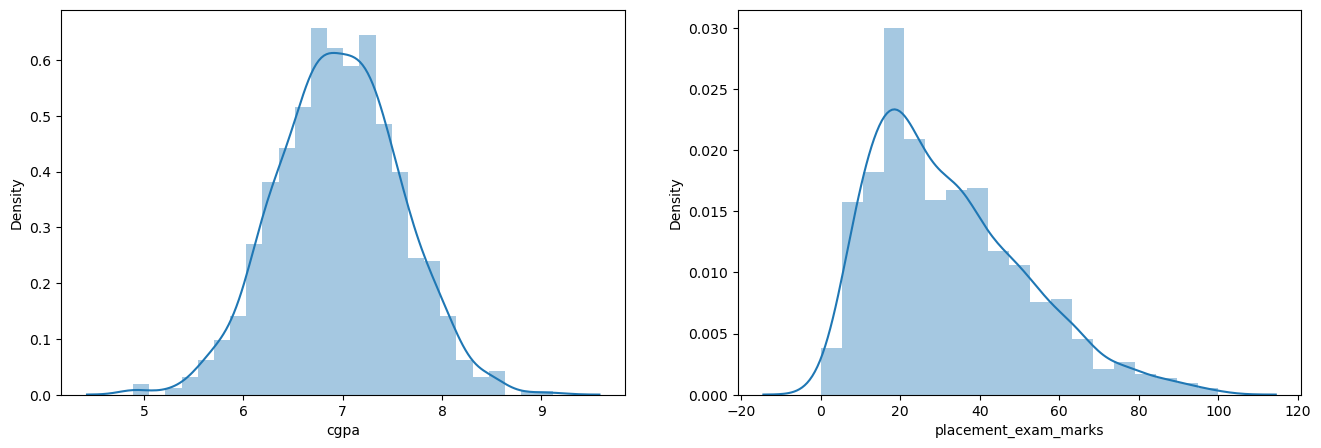

In [484]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [485]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

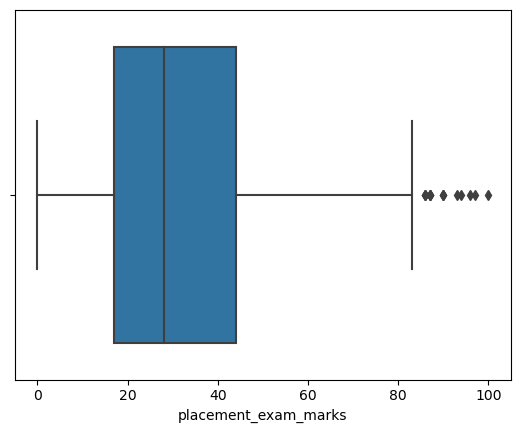

In [486]:
sns.boxplot(df['placement_exam_marks'])

In [487]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [488]:
iqr = percentile75 - percentile25

In [489]:
iqr

27.0

In [490]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [491]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


# Finding Outliers

In [492]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [493]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming

In [494]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [495]:
new_df.shape

(985, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

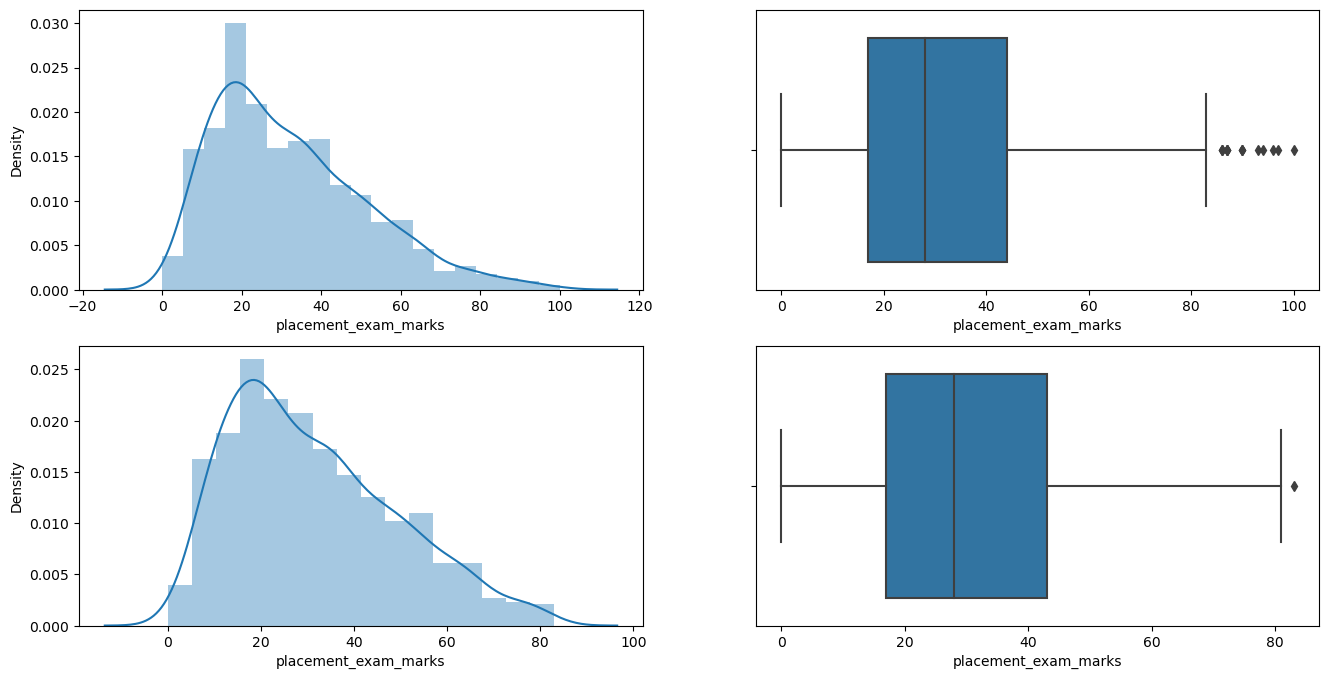

In [496]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

# Capping

In [272]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [273]:
np.where(condition,true,false)

NameError: name 'condition' is not defined

In [499]:
new_df_cap.shape

(1000, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

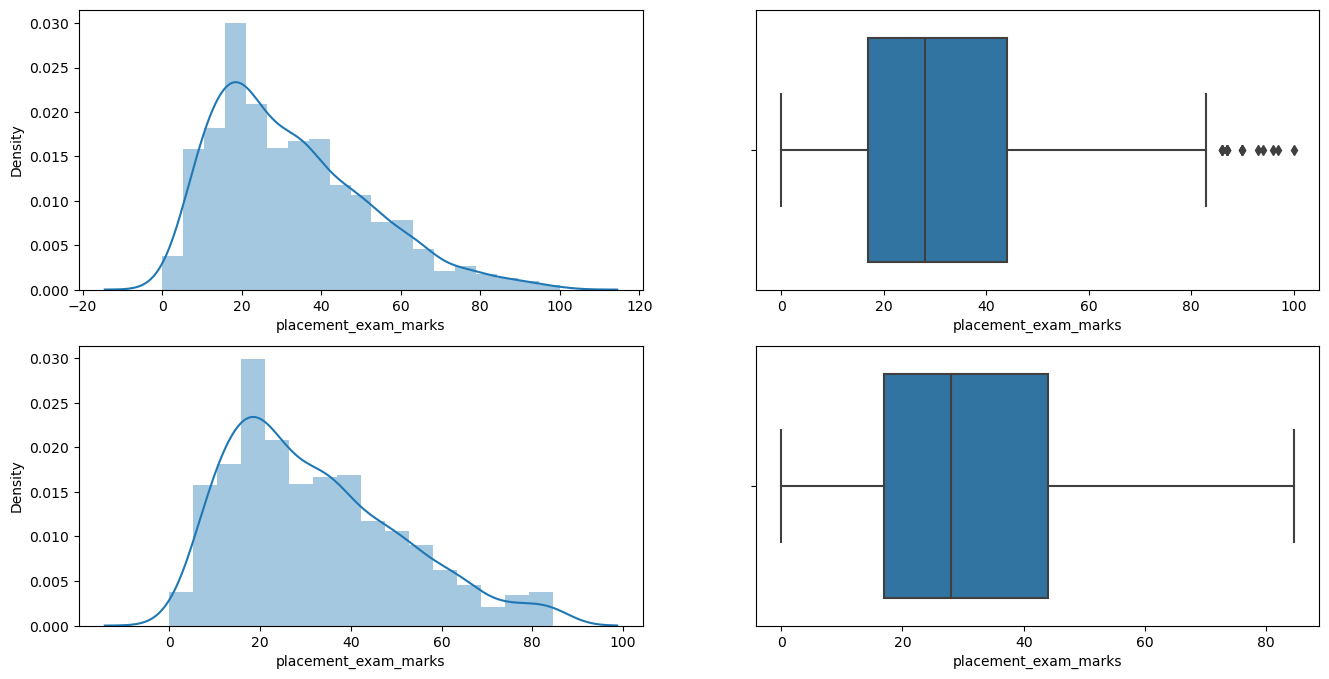

In [500]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

# 3.Outliers Detection using the percentile:

In [501]:
import numpy as np
import pandas as pd

In [503]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv')

In [504]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [505]:
df.shape

(10000, 3)

In [506]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [507]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

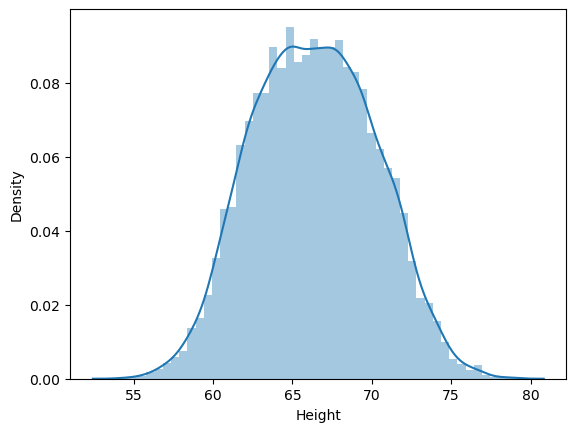

In [508]:
sns.distplot(df['Height'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

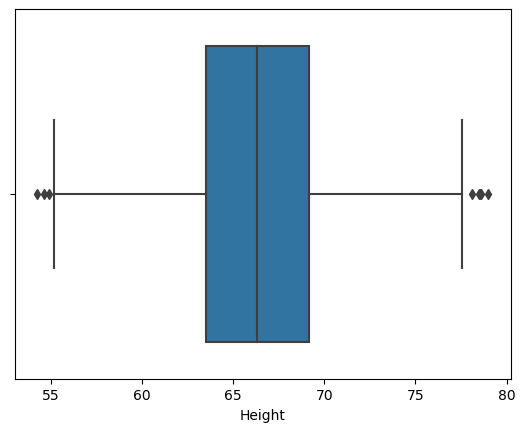

In [509]:
sns.boxplot(df['Height'])

In [510]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [511]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [512]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [513]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [514]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

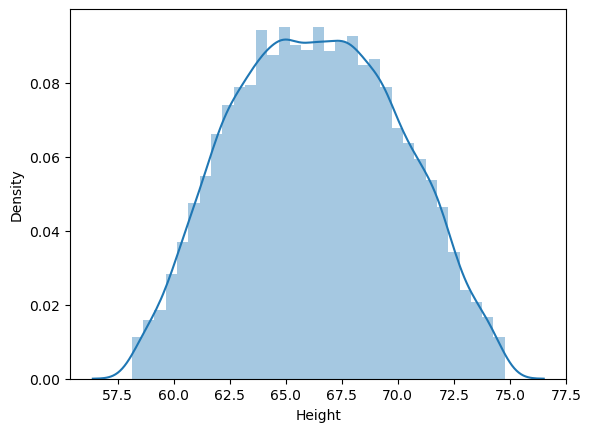

In [515]:
sns.distplot(new_df['Height'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

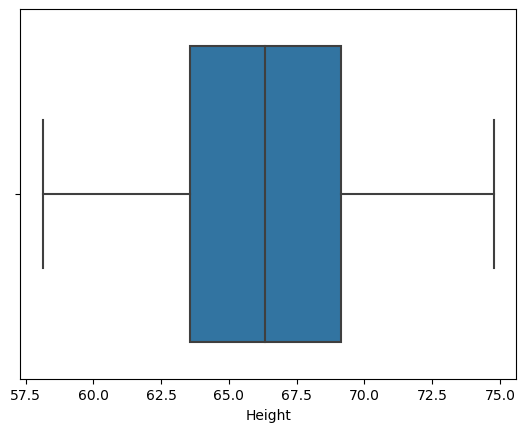

In [516]:
sns.boxplot(new_df['Height'])

In [517]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [518]:
df.shape

(10000, 3)

In [519]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

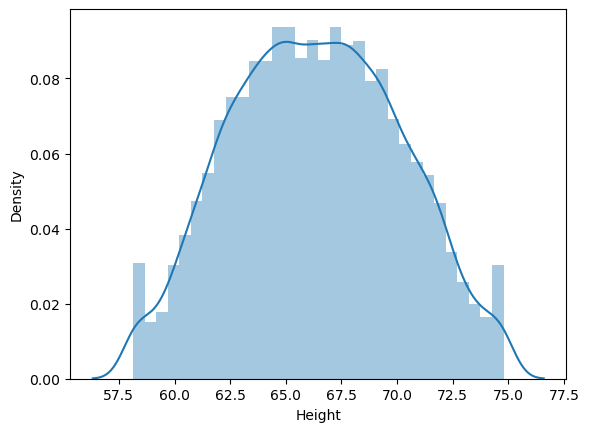

In [521]:
sns.distplot(df['Height'])

In [ ]:
sns.boxplot(df['Height'])